In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#표 한글, 음수표현 처리
import matplotlib
import matplotlib.font_manager as fm
font_location = 'C:/Windows/Fonts/malgun.ttf'
font_name = fm.FontProperties(fname='C:/Windows/Fonts/malgun.ttf').get_name()
matplotlib.rc('font',family=font_name)
matplotlib.rcParams['axes.unicode_minus'] = False

In [3]:
# vscode) hide panel : ctrl + J

In [4]:
ABC = pd.read_excel('ppl_all_brand_category.xlsx')
AP = pd.read_excel('ppl_all_product.xlsx')

# All Brand Category
'브랜드명'과'품목'으로 구성된 Dataframe

In [5]:
ABC.head()

,더메디닥터 클렌징,킵쿨 에센스,S2ND 크림,에르쯔틴 쿨링젤,에스미아 쿠션,에르쯔틴 젤,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,해피홈 트러블키트,MINI AUDREY(미니오드리),...,모모백 - 카멜,Two Color Square,J192MSE027,오버사이즈 베이직 후드티(오렌지),19SS 스트라이프 더블버튼 수트,데님 반바지,로고프린팅 루즈핏티셔츠,2019 S/S 소매 레터링 더블재킷,기본핏자켓,리잘록 레터링포인트 배색가디건
0,0.0,0,0,0,4.49438,0,0,0,0,0,...,0,0,0.0,0,0,24.61538,0,0,0.0,0
1,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,0.0,0,0,24.10256,0,0,0.0,0
2,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,0.0,0,0,23.07692,0,0,0.0,0
3,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,0.0,0,0,16.92307,0,0,0.0,0
4,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,100.0,0,0,17.94871,0,0,0.0,0


In [6]:
ABC.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 446 entries, 더메디닥터 클렌징 to 리잘록 레터링포인트 배색가디건
dtypes: float64(190), int64(256)
memory usage: 212.7 KB


In [7]:
sum(ABC.isnull().sum())

0

In [8]:
# row별(446개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(ABC.index)):
    Row_mean.append(ABC.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
ABC['Row_mean'] = Row_mean

ABC.columns


Index(['더메디닥터 클렌징', '킵쿨 에센스', 'S2ND 크림', '에르쯔틴 쿨링젤', '에스미아 쿠션', '에르쯔틴 젤',
       '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향', '해피홈 트러블키트', 'MINI AUDREY(미니오드리)',
       ...
       'Two Color Square', 'J192MSE027', '오버사이즈 베이직 후드티(오렌지)',
       '19SS 스트라이프 더블버튼 수트', '데님 반바지', '로고프린팅 루즈핏티셔츠', '2019 S/S 소매 레터링 더블재킷',
       '기본핏자켓 ', '리잘록 레터링포인트 배색가디건', 'Row_mean'],
      dtype='object', length=447)

In [9]:
# 이격도 제작('avg_5')
# ['Row_mean']의 5일간격(해당일 전5일) 평균치

avg_5 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_5.append(ABC['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5.head(10)
ABC['avg_5'] = avg_5

ABC.columns

Index(['더메디닥터 클렌징', '킵쿨 에센스', 'S2ND 크림', '에르쯔틴 쿨링젤', '에스미아 쿠션', '에르쯔틴 젤',
       '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향', '해피홈 트러블키트', 'MINI AUDREY(미니오드리)',
       ...
       'J192MSE027', '오버사이즈 베이직 후드티(오렌지)', '19SS 스트라이프 더블버튼 수트', '데님 반바지',
       '로고프린팅 루즈핏티셔츠', '2019 S/S 소매 레터링 더블재킷', '기본핏자켓 ', '리잘록 레터링포인트 배색가디건',
       'Row_mean', 'avg_5'],
      dtype='object', length=448)

In [10]:
# 이격도 제작('avb_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(ABC['Row_mean'])):
    avg_10.append(ABC['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
ABC['avg_10'] = avg_10
ABC['avg_10'][56:61] = np.nan

ABC.columns

Index(['더메디닥터 클렌징', '킵쿨 에센스', 'S2ND 크림', '에르쯔틴 쿨링젤', '에스미아 쿠션', '에르쯔틴 젤',
       '비엠비코 퀸79노블 골드세럼', '데일리 아이마스크 장미향', '해피홈 트러블키트', 'MINI AUDREY(미니오드리)',
       ...
       '오버사이즈 베이직 후드티(오렌지)', '19SS 스트라이프 더블버튼 수트', '데님 반바지', '로고프린팅 루즈핏티셔츠',
       '2019 S/S 소매 레터링 더블재킷', '기본핏자켓 ', '리잘록 레터링포인트 배색가디건', 'Row_mean',
       'avg_5', 'avg_10'],
      dtype='object', length=449)

In [11]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
ABC.index = np.arange(-30,31)
ABC.head()

# DB에서 불러올 시 삭제할 수 있는 셀.

,더메디닥터 클렌징,킵쿨 에센스,S2ND 크림,에르쯔틴 쿨링젤,에스미아 쿠션,에르쯔틴 젤,비엠비코 퀸79노블 골드세럼,데일리 아이마스크 장미향,해피홈 트러블키트,MINI AUDREY(미니오드리),...,오버사이즈 베이직 후드티(오렌지),19SS 스트라이프 더블버튼 수트,데님 반바지,로고프린팅 루즈핏티셔츠,2019 S/S 소매 레터링 더블재킷,기본핏자켓,리잘록 레터링포인트 배색가디건,Row_mean,avg_5,avg_10
-30,0.0,0,0,0,4.49438,0,0,0,0,0,...,0,0,24.61538,0,0,0.0,0,19.918627,NaN,NaN
-29,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,24.10256,0,0,0.0,0,20.656514,NaN,NaN
-28,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,23.07692,0,0,0.0,0,20.314441,NaN,NaN
-27,0.0,0,0,0,0.00000,0,0,0,0,0,...,0,0,16.92307,0,0,0.0,0,19.174058,NaN,NaN
-26,0.0,0,0,0,3.37078,0,0,0,0,0,...,0,0,17.94871,0,0,0.0,0,19.689324,NaN,NaN


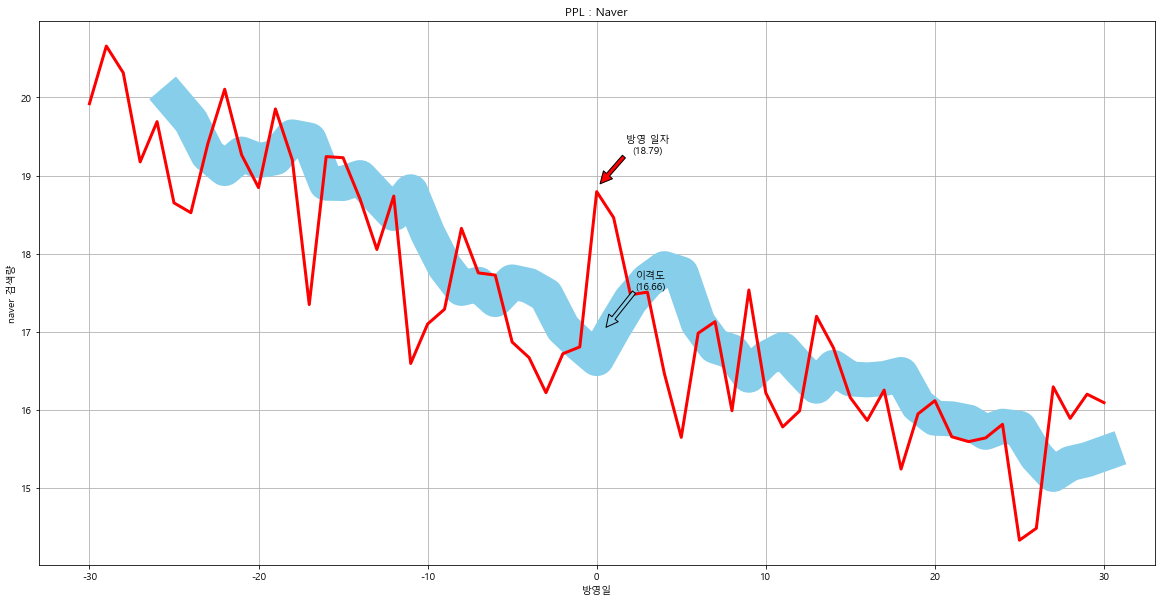

In [14]:
# avg_5


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_5'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_5'][0])+')',
            xy = (0+0.55, ABC['avg_5'][0]+0.4),
            xytext = (0+3.2, ABC['avg_5'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

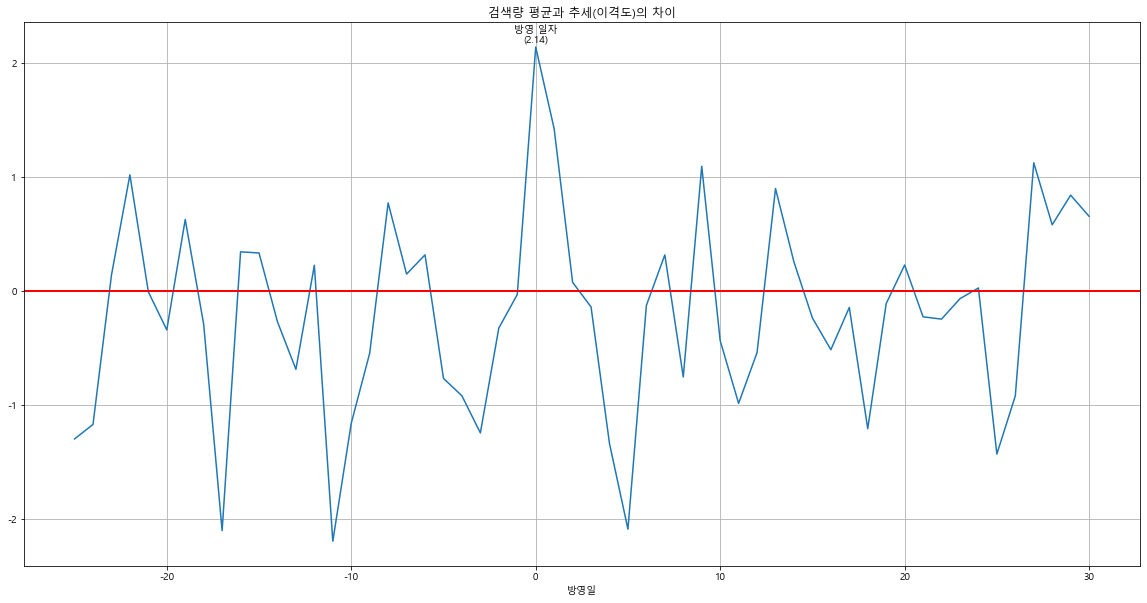

In [37]:
# avg_5


# 평균과 이격도의 차이
M_A = ABC['Row_mean'] - ABC['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

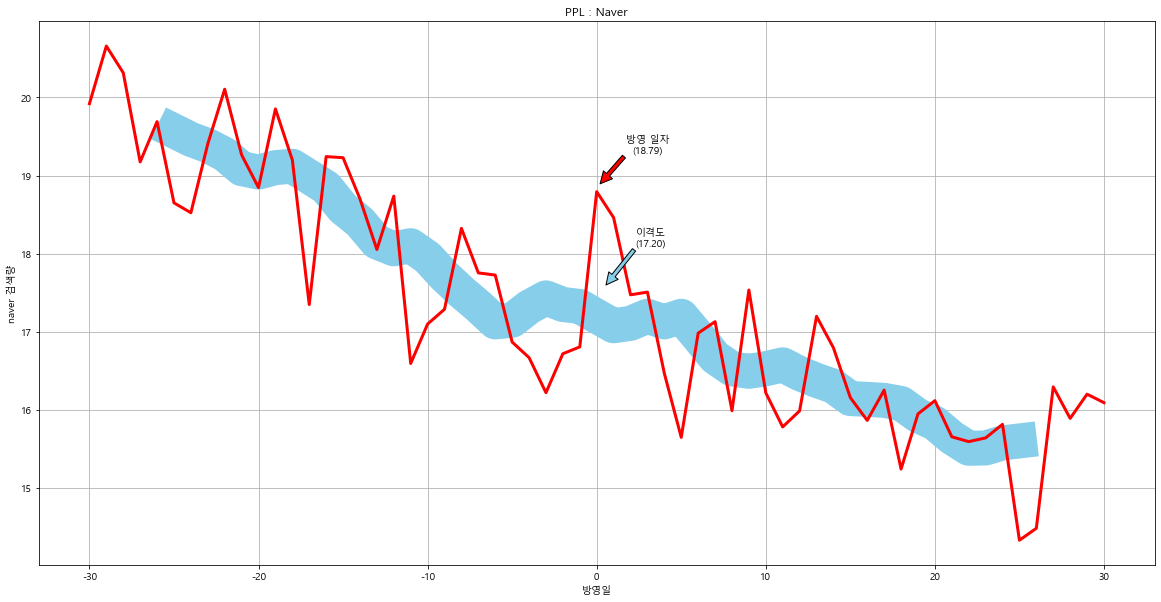

In [12]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(ABC['Row_mean'])
ax.plot(ABC.index, ABC['avg_10'],linewidth=35,color='skyblue')
ax.plot(ABC.index, ABC['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % ABC['Row_mean'][0])+')',
            xy = (0+0.2, ABC['Row_mean'][0]+0.1),
            xytext = (0+3, ABC['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % ABC['avg_10'][0])+')',
            xy = (0+0.55, ABC['avg_10'][0]+0.4),
            xytext = (0+3.2, ABC['avg_10'][0]+0.9),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

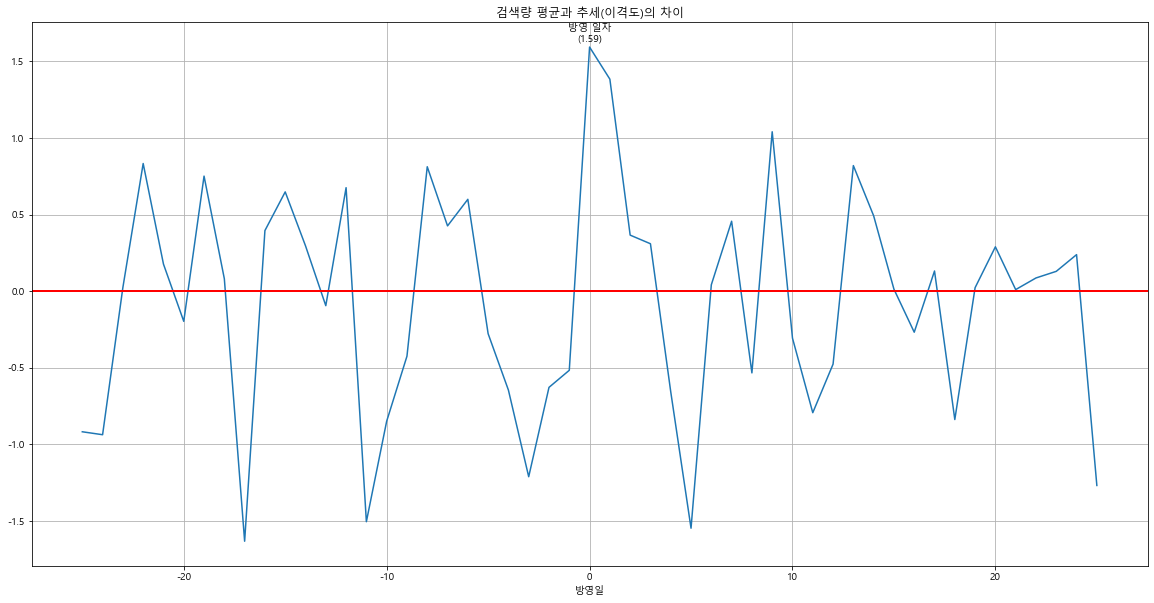

In [38]:
# avg_10


# 평균과 이격도의 차이
M_A = ABC['Row_mean'] - ABC['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(ABC['Row_mean'] - ABC['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

In [62]:
(ABC['Row_mean'][5:]-ABC['avg_5'][5:]).mean()

-0.20460568025304343

# 결론 ( 브랜드명 & 품목 ) ★★★★★★ 수정필요 (avg_5,avg_10)
    
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이격도(['avg_5'],['avg_10'])'를 사용하였다.  
'이격도'는 '평균치'의 5일(x-5), 10일(x-5,x+5)간의 평균으로 만들었다.  
  
 위의 분석을 통해서  
'간접광고'가 'Naver검색량'에 영향이 있음을 알 수 있었다.  
 해당기간 중 가장 높은 검색량은 다른 일자였지만  
단위기간 평균치와 추세선의 차(['Row_mean']-['avg_10'])에서  
방영 당일에 가장 높은 상승률(2.14)을 보였다.  
평균(-0.20)과 두 번째 최고치(1.42)를 비교해 봤을 때 . . .   
++++++++ 정확한 추세선의 범위 설정 가능?

# All Product(name)
'상품명'으로만 구성된 Dataframe

In [16]:
AP.head()

,글리셜 미셀라 클렌징 워터,킵쿨 수드 대나무 세럼,핑크터치 올인원 톤업 크림,리쥬브네이션 플레게 젤,풀커버 골드 에어쿠션,와영 에센스,스팀베이스 마스크/팩,유한양행 클리어키트,폴스부띠끄 가방,언카인드 원피스,...,글램지 가방,겟미블링 귀걸이,모조에스핀 원피스,랑베르세 후드,코모도 수트.1,씨씨콜렉트 팬츠,씨씨콜렉트 티셔츠,씨씨콜렉트 자켓,쥬시쥬디 자켓,씨씨콜렉트 가디건
0,0.0,0.00000,19.35483,0.00000,0,0,0,0,75.82582,0,...,40.74074,51.78571,70.86031,0,50.00000,0.00000,38.14432,91.2,71.42857,44.44444
1,0.0,0.00000,0.00000,26.08695,0,0,0,0,81.08108,0,...,51.85185,58.92857,70.21276,0,41.66666,66.66666,38.14432,99.2,100.00000,19.44444
2,0.0,0.00000,35.48387,0.00000,0,0,0,0,80.10510,0,...,44.44444,73.21428,68.27012,0,0.00000,41.66666,34.02061,88.0,54.28571,25.00000
3,0.0,100.00000,0.00000,21.73913,0,0,0,0,68.91891,0,...,25.92592,92.85714,75.94819,0,0.00000,0.00000,55.67010,97.6,57.14285,36.11111
4,0.0,63.63636,0.00000,0.00000,0,0,0,0,69.96996,0,...,83.33333,100.00000,95.37465,0,0.00000,83.33333,47.42268,91.2,74.28571,27.77777


In [17]:
AP.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 61 entries, 0 to 60
Columns: 444 entries, 글리셜 미셀라 클렌징 워터 to 씨씨콜렉트 가디건
dtypes: float64(172), int64(272)
memory usage: 211.7 KB


In [18]:
sum(AP.isnull().sum())

0

In [19]:
# row별(445개) 평균 컬럼 추가

Row_mean = []
for i in range(0,len(AP.index)):
    Row_mean.append(AP.iloc[i].mean())
Row_mean = pd.DataFrame(Row_mean)
AP['Row_mean'] = Row_mean
AP.columns


Index(['글리셜 미셀라 클렌징 워터', '킵쿨 수드 대나무 세럼', '핑크터치 올인원 톤업 크림', '리쥬브네이션 플레게 젤',
       '풀커버 골드 에어쿠션', '와영 에센스', '스팀베이스 마스크/팩', '유한양행 클리어키트', '폴스부띠끄 가방',
       '언카인드 원피스',
       ...
       '겟미블링 귀걸이', '모조에스핀 원피스', '랑베르세 후드', '코모도 수트.1', '씨씨콜렉트 팬츠', '씨씨콜렉트 티셔츠',
       '씨씨콜렉트 자켓', '쥬시쥬디 자켓', '씨씨콜렉트 가디건', 'Row_mean'],
      dtype='object', length=445)

In [20]:
# 이격도 제작
# ['Row_mean']의 5일간격 평균치

avg_5 = []
for i in range(0,len(AP['Row_mean'])):
    avg_5.append(AP['Row_mean'][i-5:i].mean())
avg_5 = pd.DataFrame(avg_5)
avg_5
AP['avg_5'] = avg_5
AP.columns

Index(['글리셜 미셀라 클렌징 워터', '킵쿨 수드 대나무 세럼', '핑크터치 올인원 톤업 크림', '리쥬브네이션 플레게 젤',
       '풀커버 골드 에어쿠션', '와영 에센스', '스팀베이스 마스크/팩', '유한양행 클리어키트', '폴스부띠끄 가방',
       '언카인드 원피스',
       ...
       '모조에스핀 원피스', '랑베르세 후드', '코모도 수트.1', '씨씨콜렉트 팬츠', '씨씨콜렉트 티셔츠', '씨씨콜렉트 자켓',
       '쥬시쥬디 자켓', '씨씨콜렉트 가디건', 'Row_mean', 'avg_5'],
      dtype='object', length=446)

In [21]:
# 이격도 제작('avb_10')
# ['Row_mean']의 10일간격(해당일 전후5일) 평균치

avg_10 = []
for i in range(0,len(AP['Row_mean'])):
    avg_10.append(AP['Row_mean'][i-5:i+5].mean())
avg_10 = pd.DataFrame(avg_10)
avg_10.head(10)
AP['avg_10'] = avg_10
AP['avg_10'][56:61] = np.nan

AP.columns

Index(['글리셜 미셀라 클렌징 워터', '킵쿨 수드 대나무 세럼', '핑크터치 올인원 톤업 크림', '리쥬브네이션 플레게 젤',
       '풀커버 골드 에어쿠션', '와영 에센스', '스팀베이스 마스크/팩', '유한양행 클리어키트', '폴스부띠끄 가방',
       '언카인드 원피스',
       ...
       '랑베르세 후드', '코모도 수트.1', '씨씨콜렉트 팬츠', '씨씨콜렉트 티셔츠', '씨씨콜렉트 자켓', '쥬시쥬디 자켓',
       '씨씨콜렉트 가디건', 'Row_mean', 'avg_5', 'avg_10'],
      dtype='object', length=447)

In [22]:
# 방영일자(0~60)을 (-30~0~30) 으로 변경
AP.index = np.arange(-30,31)
AP.head()

,글리셜 미셀라 클렌징 워터,킵쿨 수드 대나무 세럼,핑크터치 올인원 톤업 크림,리쥬브네이션 플레게 젤,풀커버 골드 에어쿠션,와영 에센스,스팀베이스 마스크/팩,유한양행 클리어키트,폴스부띠끄 가방,언카인드 원피스,...,랑베르세 후드,코모도 수트.1,씨씨콜렉트 팬츠,씨씨콜렉트 티셔츠,씨씨콜렉트 자켓,쥬시쥬디 자켓,씨씨콜렉트 가디건,Row_mean,avg_5,avg_10
-30,0.0,0.00000,19.35483,0.00000,0,0,0,0,75.82582,0,...,0,50.00000,0.00000,38.14432,91.2,71.42857,44.44444,17.964208,NaN,NaN
-29,0.0,0.00000,0.00000,26.08695,0,0,0,0,81.08108,0,...,0,41.66666,66.66666,38.14432,99.2,100.00000,19.44444,18.855281,NaN,NaN
-28,0.0,0.00000,35.48387,0.00000,0,0,0,0,80.10510,0,...,0,0.00000,41.66666,34.02061,88.0,54.28571,25.00000,18.078507,NaN,NaN
-27,0.0,100.00000,0.00000,21.73913,0,0,0,0,68.91891,0,...,0,0.00000,0.00000,55.67010,97.6,57.14285,36.11111,16.935224,NaN,NaN
-26,0.0,63.63636,0.00000,0.00000,0,0,0,0,69.96996,0,...,0,0.00000,83.33333,47.42268,91.2,74.28571,27.77777,17.787656,NaN,NaN


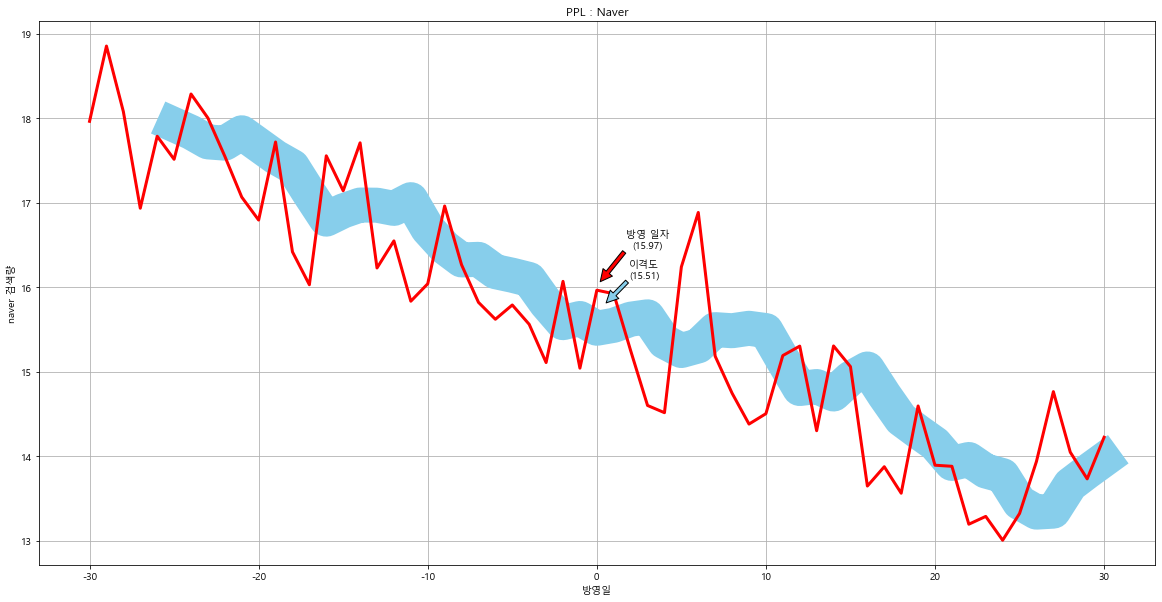

In [34]:
# avg_5


# plot 출력

fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_5'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_5'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_5'][0])+')',
            xy = (0+0.55, AP['avg_5'][0]+0.3),
            xytext = (0+2.8, AP['avg_5'][0]+0.6),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

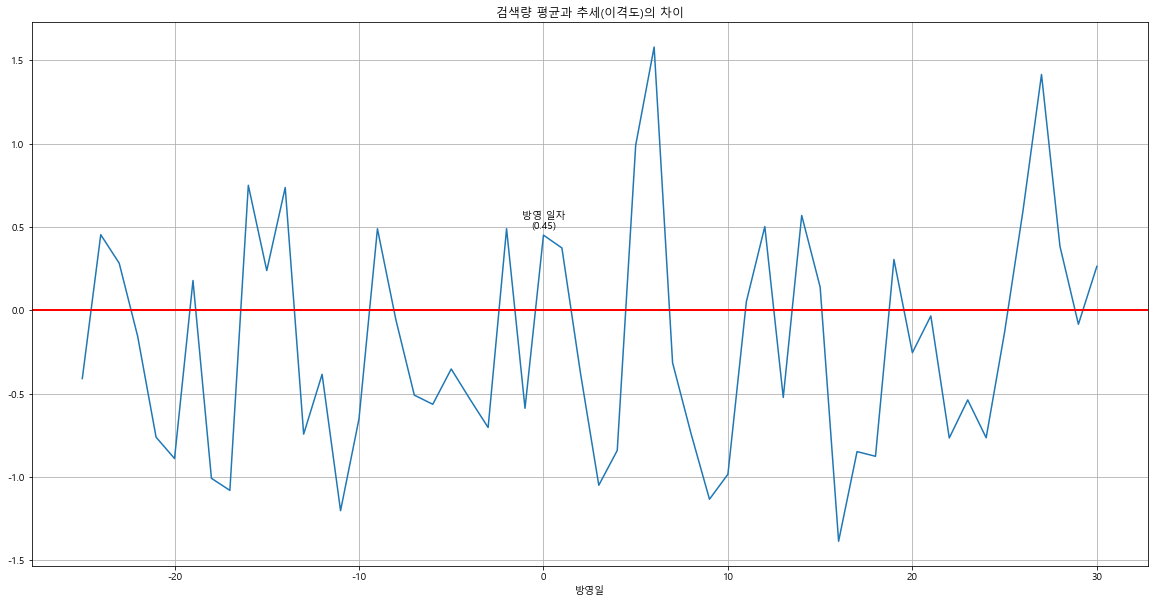

In [39]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_5']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_5'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

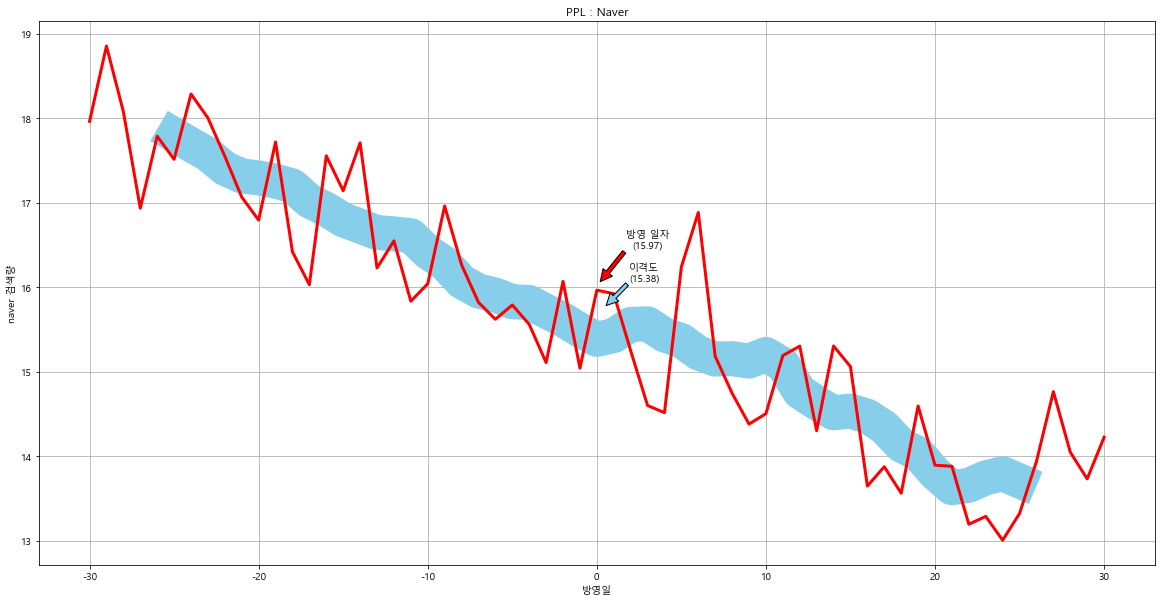

In [29]:
# avg_10


# plot 출력
fig = plt.figure(figsize=(20,10))
ax = fig.add_subplot(1,1,1)


plt.plot(AP['Row_mean'])
ax.plot(AP.index, AP['avg_10'],linewidth=35,color='skyblue')
ax.plot(AP.index, AP['Row_mean'],linewidth=3,color='red')
plt.xlabel('방영일')
plt.ylabel('naver 검색량')
plt.title('PPL : Naver')
# annot : 'Row_mean'
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % AP['Row_mean'][0])+')',
            xy = (0+0.2, AP['Row_mean'][0]+0.1),
            xytext = (0+3, AP['Row_mean'][0]+0.5),
            ha = 'center',
            arrowprops={'facecolor' : 'red'}
            )
# annot : 'avg_10'
plt.annotate('이격도'+'\n'+'('+str('%.2f' % AP['avg_10'][0])+')',
            xy = (0+0.55, AP['avg_10'][0]+0.4),
            xytext = (0+2.8, AP['avg_10'][0]+0.7),
            ha = 'center',
            arrowprops={'facecolor' : 'skyblue'}
            )
plt.grid(True)

plt.show()

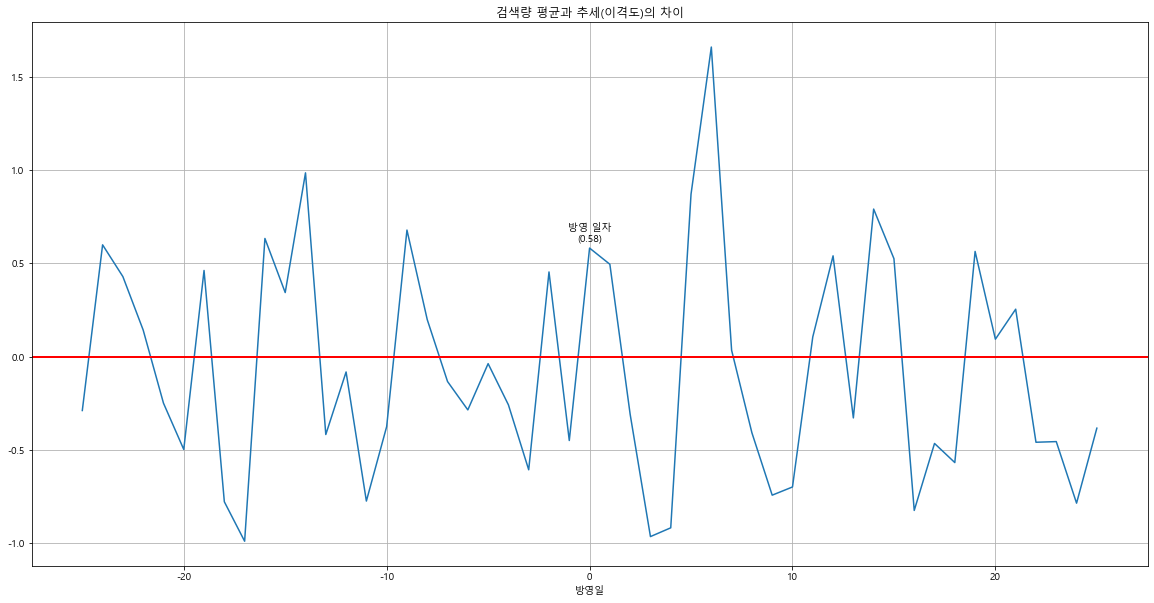

In [63]:
# 평균과 이격도의 차이
M_A = AP['Row_mean'] - AP['avg_10']

plt.figure(figsize=(20,10))
plt.title('검색량 평균과 추세(이격도)의 차이')

plt.plot(AP['Row_mean'] - AP['avg_10'])
plt.axhline(y=0, color='r', linewidth=2)

plt.xlabel('방영일')
plt.annotate('방영 일자'+'\n'+'('+str('%.2f' % M_A[0])+')',
            xy =(0,M_A[0]+0.04),
            ha = 'center')

plt.grid(True)

plt.show()

# 결론 ( 상품명 )
    
분석결과, 간접광고(PPL)는 Naver의 검색량에 영향을 주었다.  
영향 측정은 간접광고 방영 전후 30일전, 당일, 30일후로 나누어  
모든 품목들의 해당일자의 '평균치(['Row_mean'])'를 만들었고,  
'평균치'가 유의미한지 추세를 제공하는지 알아보기 위해 '이격도(['avg_5'],['avg_10'])'를 사용하였다.  
'이격도'는 '평균치'의 5일간의 평균으로 만들었다.  
  
위의 분석을 통해서  
간접광고가 상품명의 검색에는 영향력이 유의미하게 발견되지 않았다.

# 최종 결론
    
PPL과  Naver검색의 상관성에대한 분석.  
1. 브랜드이름, 품목으로 검색  
2. 상품명으로 검색  
  
 공통적으로 두 모델 모두 단위 기간의 추세에 대해서  
상승세를 보였다. ( PPL이 Naver검색량에 영향이 있음 )  
 하지만 '1.'과 '2.'로 나누어서 분석해본 결과가 같은 단위기간임을 감안했을 때,  
검색 수단으로 정확한 상품명을 검색하기 보다는  
그 브랜드명, 혹은 품목을 검색하는 경우가 많았다고 분석할 수 있다.
  
'해당 분석'에서 알 수 없는 다른 요인에 의한 검색량 폭등('1.'과 '2.'에서)과  
PPL의 영향력(방영당일 상승폭)에 대해서 비교 해봤을 때,  
간접광고의 궁극적인 목적이  
구전, 인지도 상승으로는 적합하지 않다고 볼 수 있다.
